In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# %matplotlib inline
# import matplotlib as mpl
# mpl.rcParams['figure.dpi']=75
# plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams.update({'font.family':'sans-serif'})
# plt.rcParams.update({'font.sans-serif':'Arial'})

In [2]:
params = {
    'figure.figsize': (10, 8),       # Figure size in inches
    'figure.dpi': 300,               # Resolution in dots per inch
    'axes.labelsize': 24,            # Font size of the axes labels
    'axes.titlesize': 24,            # Font size of the subplot titles
    'axes.titlepad': 20,             # Spacing between the subplot title and the plot
    'axes.linewidth': 1.5,           # Width of the axis lines
    'axes.grid': False,              # Display grid lines
    'axes.grid.axis': 'both',        # Display grid lines for both major and minor ticks
    'grid.alpha': 0.5,               # Transparency of the grid lines
    'grid.linewidth': 0.5,           # Width of the grid lines
    'xtick.labelsize': 20,           # Font size of the x-axis tick labels
    'ytick.labelsize': 20,           # Font size of the y-axis tick labels
    'xtick.major.size': 6,           # Length of the major x-axis ticks in points
    'xtick.major.width': 1.5,        # Width of the major x-axis ticks
    'ytick.major.size': 6,           # Length of the major y-axis ticks in points
    'ytick.major.width': 1.5,        # Width of the major y-axis ticks
    'xtick.minor.size': 4,           # Length of the minor x-axis ticks in points
    'xtick.minor.width': 1.0,        # Width of the minor x-axis ticks
    'ytick.minor.size': 4,           # Length of the minor y-axis ticks in points
    'ytick.minor.width': 1.0,        # Width of the minor y-axis ticks
    'xtick.direction': 'in',         # Direction of the x-axis ticks ('in', 'out', or 'inout')
    'ytick.direction': 'in',         # Direction of the y-axis ticks ('in', 'out', or 'inout')
    'legend.fontsize': 18,           # Font size of the legend
    'legend.frameon': True,          # Whether to draw a frame around the legend
    'legend.facecolor': 'inherit',   # Background color of the legend
    'legend.edgecolor': '0.8',       # Edge color of the legend
    'legend.framealpha': 0.8,        # Transparency of the legend frame
    'legend.loc': 'best',            # Location of the legend ('best', 'upper right', 'upper left', 'lower left', etc.)
    'legend.title_fontsize': 20,     # Font size of the legend title
    'text.usetex': False,            # Whether to use LaTeX for text rendering
    'pdf.fonttype': 42               # Output font type for PDF files
}

plt.rcParams.update(params)
plt.style.use('seaborn-v0_8-colorblind')

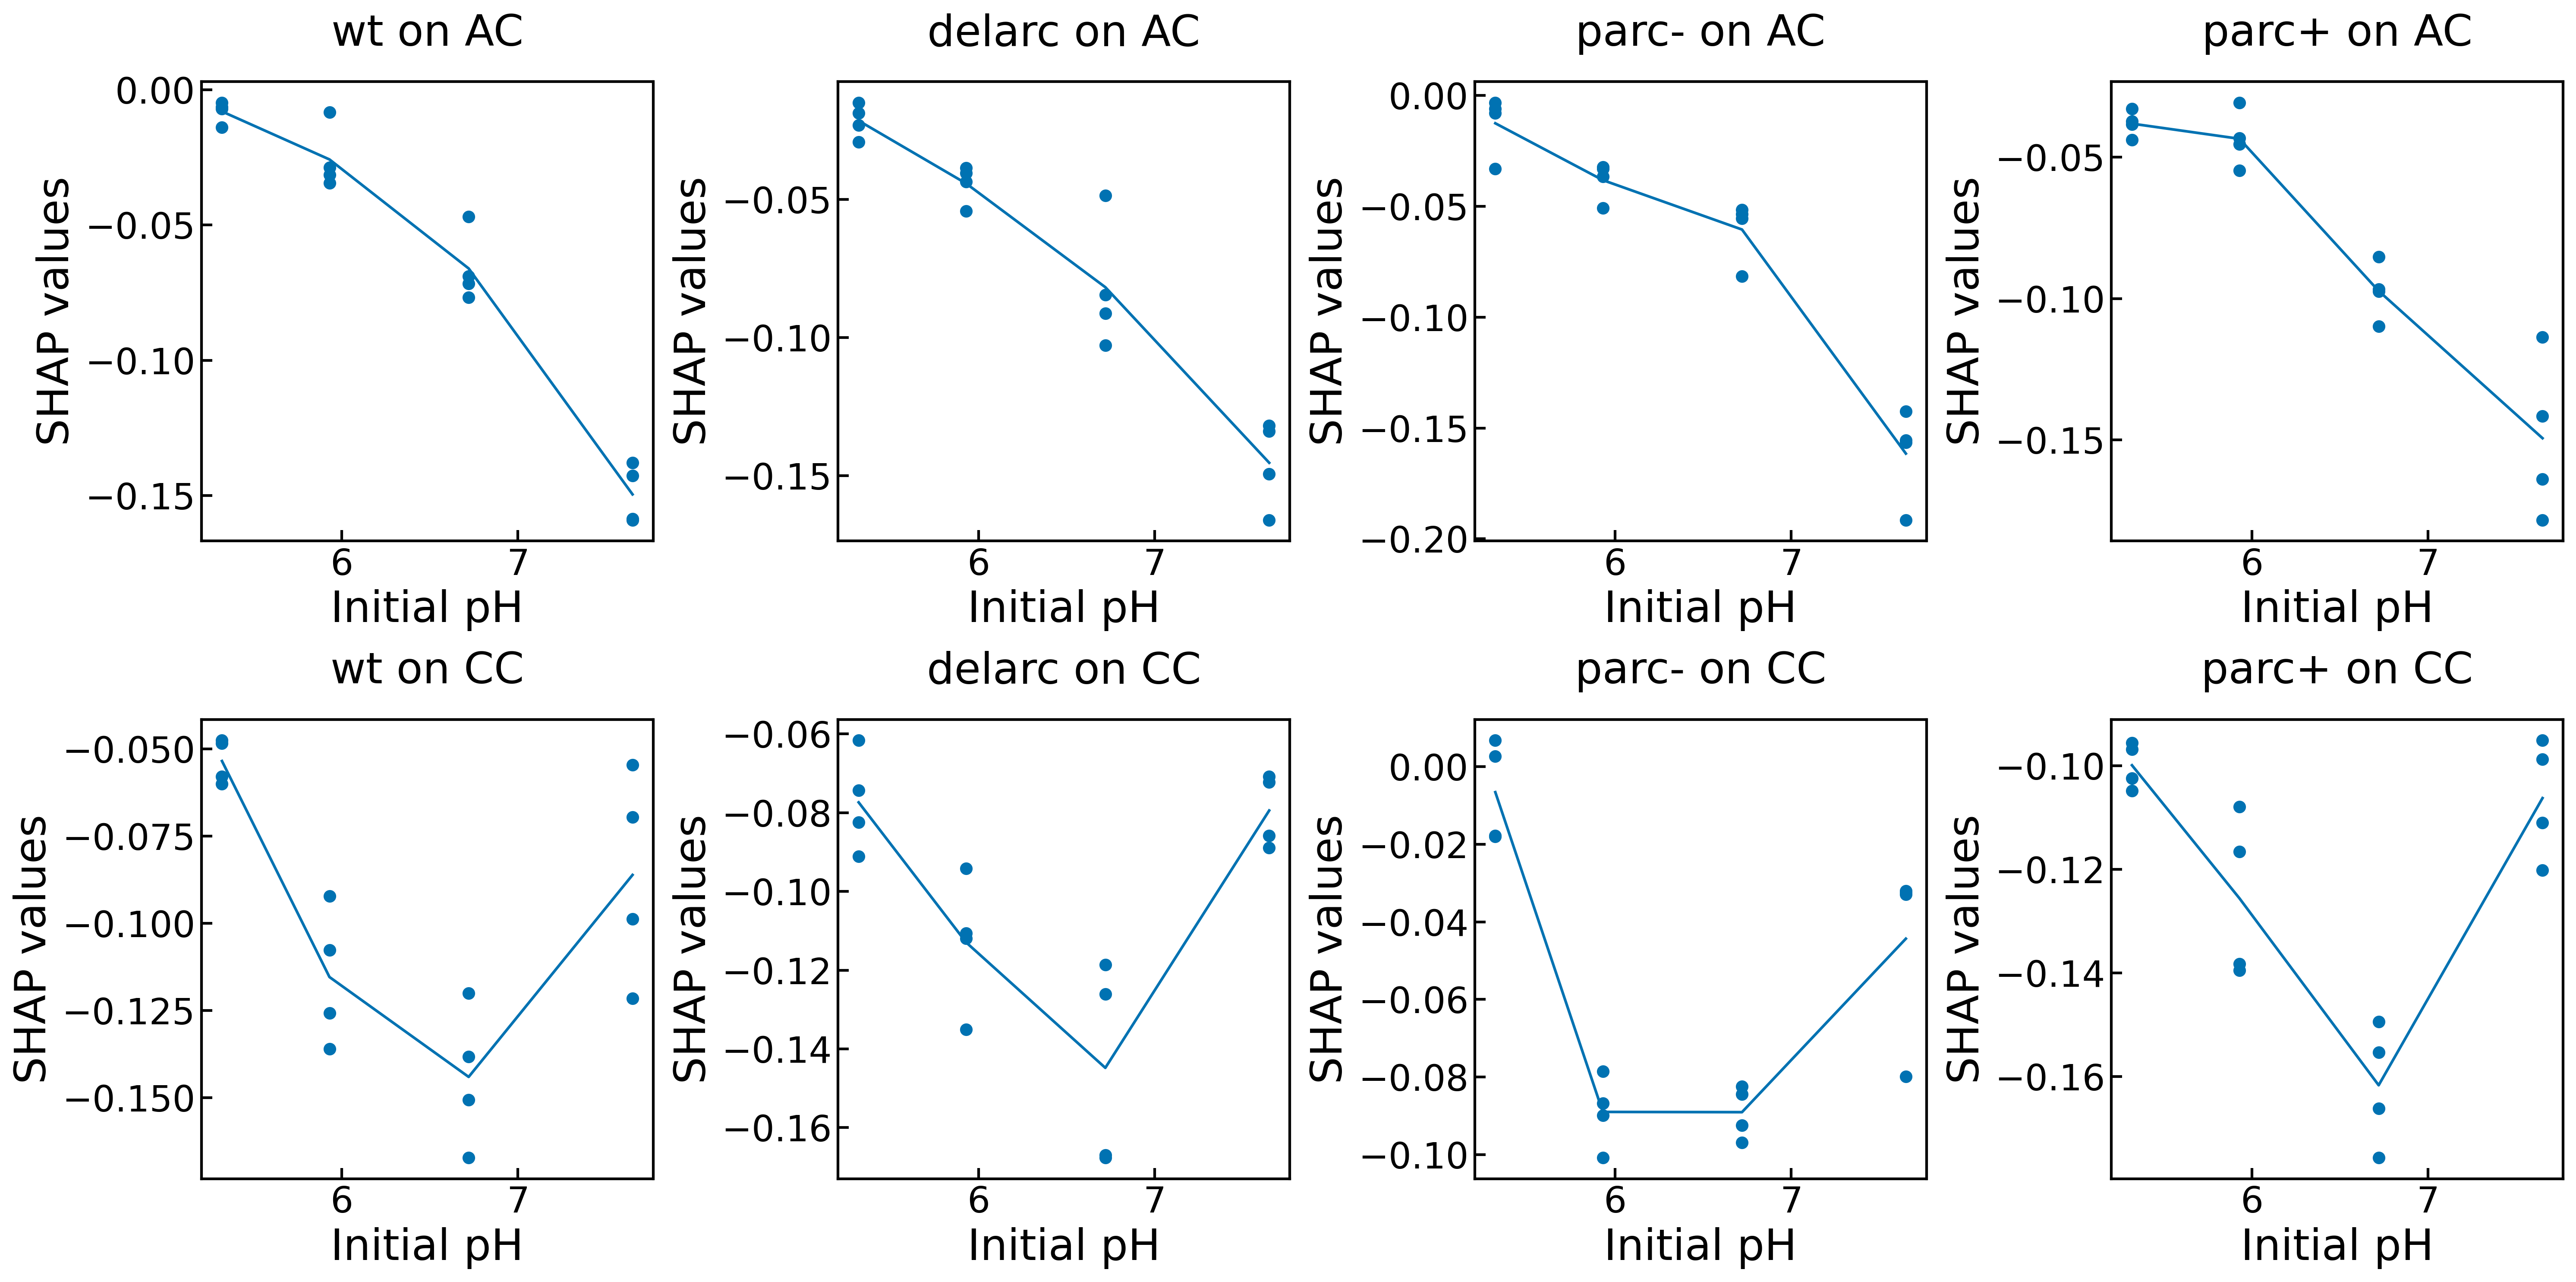

In [3]:
# Butyrate producing species
not_ecoli = ['AC_OD', 'CC_OD']

# set of ecoli strains
ecoli_strains =  ['wt_OD', 'delarc_OD', 'parc-_OD', 'parc+_OD']

# init figure
plt.figure(figsize=(20, 10))
k = 1

# loop over receiver strains
for i, receiver in enumerate(not_ecoli):

    # loop over ecoli strains
    for j, effector in enumerate(ecoli_strains):
    
        # import SHAP values 
        int_df = pd.read_csv(f"insights/{effector}/{receiver}_shap.csv")

        # only consider samples with both receiver and effector species present
        receiver_design = int_df[receiver].values
        effector_design = int_df[effector].values
        interaction = int_df[f"{receiver}<--{effector}"].values[(receiver_design>0) & (effector_design>0)]
        pHvals = int_df[f"pH"].values[(receiver_design>0) & (effector_design>0)]

        # unscale pHvals 
        pHvals = pHvals * (8.13336133 - 5.00827608) + 5.00827608

        # average at each pH value 
        unique_pH = np.unique(pHvals)
        avg_int = [np.mean(interaction[np.isin(pHvals, pHval)]) for pHval in unique_pH]
        
        # plot interaction vs pH
        plt.subplot(2, 4, k)
        k += 1
        plt.scatter(pHvals, interaction)
        plt.plot(unique_pH, avg_int)
        plt.xlabel("Initial pH")
        plt.ylabel("SHAP values")
        plt.title(f"{effector.split("_")[0]} on {receiver.split("_")[0]}")
plt.tight_layout()
plt.savefig("Figures/Ecn_on_BPs/Ecn_on_BPs.png")
plt.show()